# 最高频元素的频数

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/frequency-of-the-most-frequent-element/**

## 一、题目

元素的 频数 是该元素在一个数组中出现的次数。

给你一个整数数组 nums 和一个整数 k 。在一步操作中，你可以选择 nums 的一个下标，并将该下标对应元素的值增加 1 。

执行最多 k 次操作后，返回数组中最高频元素的 最大可能频数 。

### 提示：

- 1 <= nums.length <= 10^5
- 1 <= nums[i] <= 10^5
- 1 <= k <= 10^5

## 二、示例

### 示例 1：

输入：nums = [1,4,8,13], k = 5

输出：2

解释：存在多种最优解决方案：

- 对第一个元素执行 3 次递增操作，此时 nums = [4,4,8,13] 。4 是数组中最高频元素，频数是 2 。
- 对第二个元素执行 4 次递增操作，此时 nums = [1,8,8,13] 。8 是数组中最高频元素，频数是 2 。
- 对第三个元素执行 5 次递增操作，此时 nums = [1,4,13,13] 。13 是数组中最高频元素，频数是 2 。

### 示例 3：

输入：nums = [3,9,6], k = 2

输出：1

## 三、解题思路

### 滑动窗口

最值问题，我们首先判断出要先将数组排序。

我们采用滑动窗口的方法来找出答案，定义一个left跟right，作为滑动窗口的两端。

题目的本质就是我们用整数k去补充滑动窗口内的所有数字到滑动窗口最大值之间的差，如下面两幅图所示。

当right向右滑动一步，用k减去对应的红色部分的面积：如果k仍大于0，那么这个滑动窗口是符合题意的；如果k小于0，那么这个滑动窗口需要整体右移一步。也就是left也同步向右滑动一步。

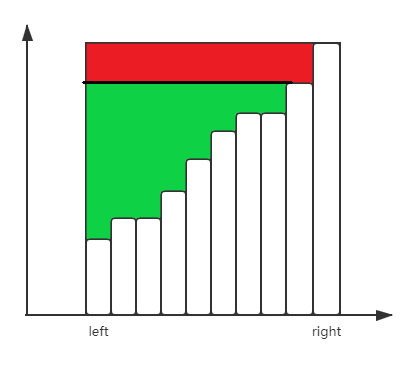

left向右滑动一步，就要用k加上对应的蓝色部分的面积，这一步是保证滑动窗口的整体右移。

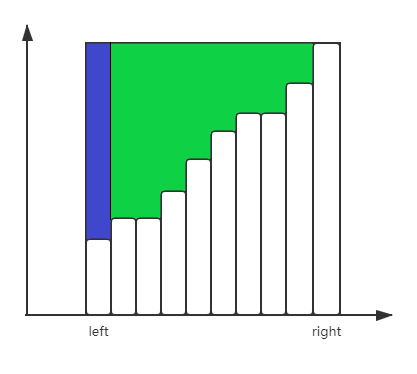

Question：为什么left不用一直向右滑动直到k大于0呢？

Answer：因为我们的答案是找出最大可能频数，也就是滑动窗口的大小。如果left一直向右滑动的话，那么会找到比原来更小的答案，但是这样的答案不是我们所需要的。换句话说就是滑动窗口的大小只增不减。

#### 本题解和图片出处：

作者：AuthenticMan

链接：https://leetcode-cn.com/problems/frequency-of-the-most-frequent-element/solution/pai-xu-hua-dong-chuang-kou-tu-jie-by-aut-62jj/

来源：力扣（LeetCode）

著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [1]:
def maxFrequency(nums, k: int) -> int:
    nums.sort()
    n = len(nums)
    l, r = 0, 1
    ret = 1
    while r < n:
        # 右边右移，需要消耗(nums[r] - nums[r-1]) * (r-l)
        k-= (nums[r] - nums[r-1]) * (r-l)
        if k >= 0:
            ret = r-l + 1
        else:
            # k不足以右移，则左边右移，则可以恢复左边右移前右边和左边的差
            k += (nums[r] - nums[l])
            l += 1
        r+=1
    return ret

In [2]:
maxFrequency(nums = [1,2,4], k = 5)

3

In [3]:
maxFrequency(nums = [1,4,8,13], k = 5)

2

In [4]:
maxFrequency(nums = [3,9,6], k = 2)

1